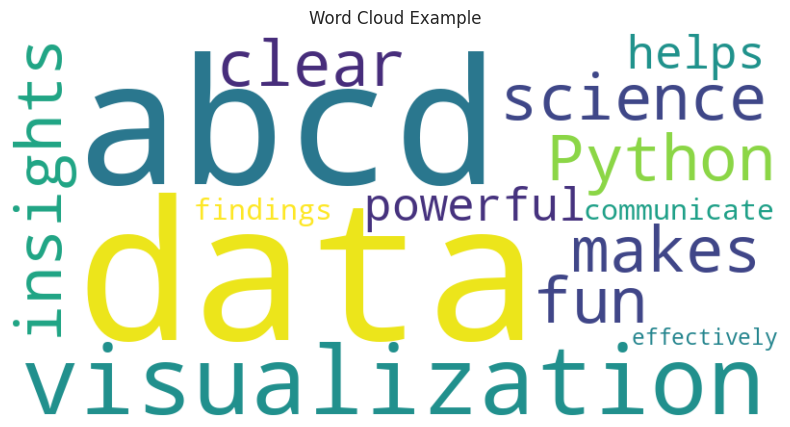

In [49]:
#Wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = """
Python data visualization is fun. Data science with visualization makes insights clear and powerful.
Visualization helps communicate findings effectively data data data abcd abcd abcd abcd
"""

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Example")
plt.show()


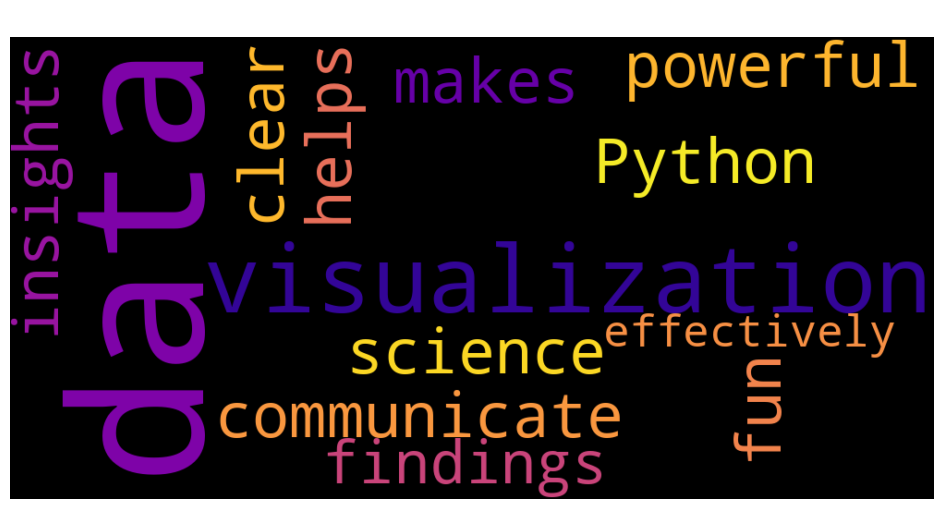

In [55]:
#Wordcloud with stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["and", "the", "of", "to", "abcd"])  # remove common words

wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='black',     # background color
    colormap='plasma',            # color map ('viridis', 'cool', 'rainbow', etc.)
    max_words=80,                 # maximum number of words
    min_font_size=10,             # smallest font size
    max_font_size=200,            # largest font size
    stopwords=custom_stopwords,   # stop words to remove
    contour_color='white',        # outline color
    contour_width=2,              # outline thickness
    prefer_horizontal=0.5         # more horizontal words
).generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Customized Word Cloud", fontsize=18, color='white')
plt.show()


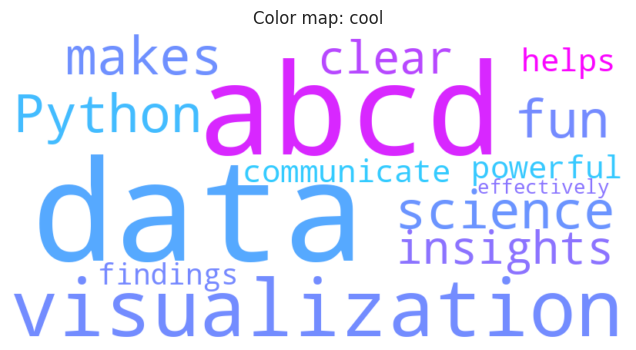

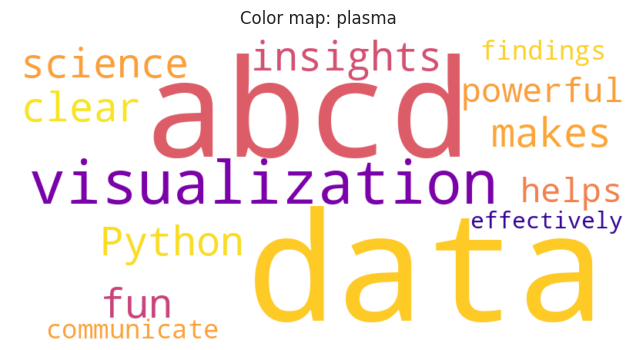

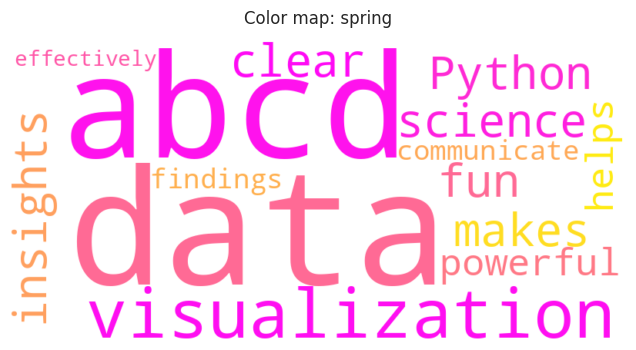

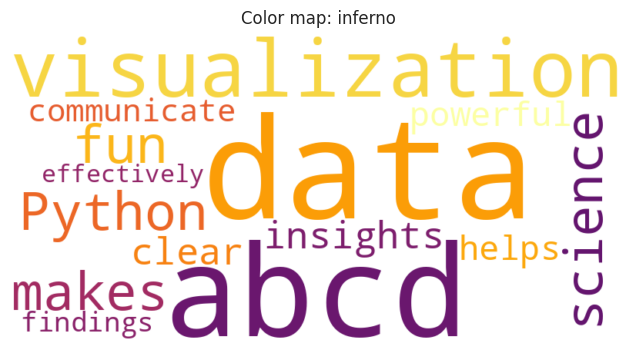

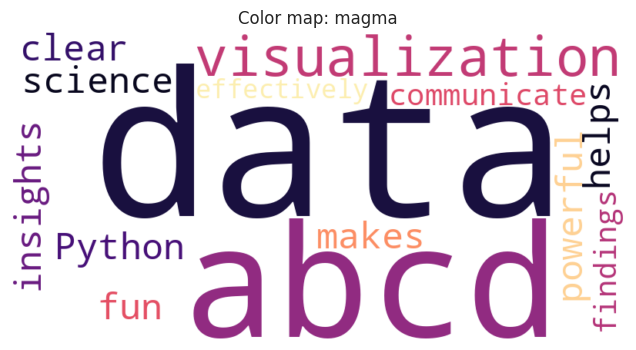

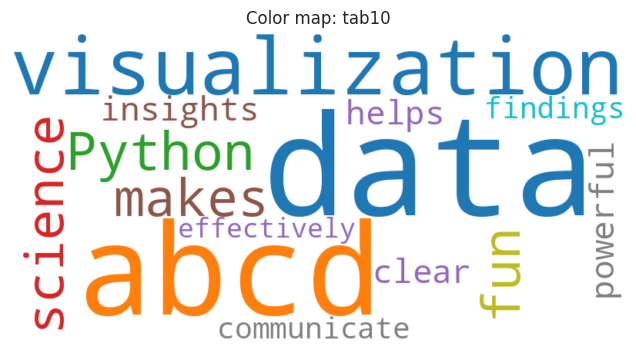

In [56]:
#wordcloud with different colors
for cmap in ['cool', 'plasma', 'spring', 'inferno', 'magma', 'tab10']:
    wc = WordCloud(width=800, height=400, background_color='white', colormap=cmap).generate(text)
    plt.figure(figsize=(8,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Color map: {cmap}")
    plt.show()


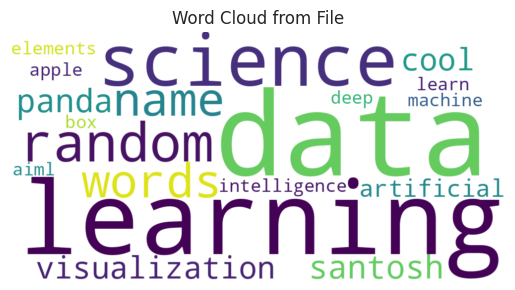

In [57]:
# Wordcloud example from a text file
with open('/content/random.txt', 'r', encoding='utf-8') as f:
    text_data = f.read()

wc = WordCloud(width=1000, height=500, background_color='white').generate(text_data)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from File")
plt.show()


In [13]:
#Plotly
import plotly.express as px
import plotly.graph_objects as go


In [45]:
# Built-in dataset
df = px.data.gapminder()
#This dataset contains country-level data like GDP, life expectancy, and population.
df.head(10)


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
5,Afghanistan,Asia,1977,38.438,14880372,786.113360,AFG,4
6,Afghanistan,Asia,1982,39.854,12881816,978.011439,AFG,4
7,Afghanistan,Asia,1987,40.822,13867957,852.395945,AFG,4
8,Afghanistan,Asia,1992,41.674,16317921,649.341395,AFG,4
9,Afghanistan,Asia,1997,41.763,22227415,635.341351,AFG,4


In [58]:
#Scatter Plot
fig = px.scatter(df[df['year']==2007],
                 x='gdpPercap', y='lifeExp',
                 color='continent', size='pop',
                 hover_name='country',
                 log_x=True,
                 title='Life Expectancy vs GDP per Capita (2007)')
fig.show()


In [59]:
#line plot
fig = px.line(df[df['country'].isin(['India', 'China', 'United States'])],
              x='year', y='lifeExp', color='country',
              title='Life Expectancy Over the Years')
fig.show()


In [ ]:
fig = px.bar(df[df['year']==2007],
             x='continent', y='pop', color='continent',
             title='Population by Continent (2007)')
fig.show()


In [ ]:
fig = px.histogram(df[df['year']==2007],
                   x='lifeExp', color='continent',
                   nbins=30, title='Distribution of Life Expectancy (2007)')
fig.show()


In [ ]:
# Box plot
fig = px.box(df[df['year']==2007],
             x='continent', y='lifeExp', color='continent',
             title='Life Expectancy by Continent (2007)')
fig.show()

# Violin plot
fig = px.violin(df[df['year']==2007],
                x='continent', y='lifeExp', color='continent', box=True, points='all',
                title='Violin Plot: Life Expectancy by Continent')
fig.show()


In [ ]:
fig = px.scatter(df, x="gdpPercap", y="lifeExp",
                 animation_frame="year", animation_group="country",
                 size="pop", color="continent", hover_name="country",
                 log_x=True, size_max=60,
                 title='Animated GDP vs Life Expectancy (1952–2007)')
fig.show()


In [28]:
fig.write_html("plot.html")   # interactive HTML file
#fig.write_image("plot.png")   # requires 'kaleido' package


In [ ]:
fig = px.scatter_3d(df[df['year']==2007],
                    x='gdpPercap', y='lifeExp', z='pop',
                    color='continent', size='pop', hover_name='country',
                    title='3D Visualization: GDP, LifeExp, Population (2007)')
fig.show()


In [ ]:
fig.update_layout(
    title='Customized Chart Example',
    xaxis_title='GDP Per Capita (log scale)',
    yaxis_title='Life Expectancy',
    plot_bgcolor='white',
    font=dict(size=14)
)
fig.show()


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=('LifeExp', 'GDP'))

fig.add_trace(go.Box(y=df[df['year']==2007]['lifeExp'], name='LifeExp'), row=1, col=1)
fig.add_trace(go.Box(y=df[df['year']==2007]['gdpPercap'], name='GDP'), row=1, col=2)

fig.update_layout(title='Comparison of LifeExp and GDP (2007)')
fig.show()


In [ ]:
fig = px.choropleth(df[df['year']==2007],
                    locations='iso_alpha',
                    color='lifeExp',
                    hover_name='country',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Global Life Expectancy (2007)')
fig.show()


In [ ]:
fig = px.scatter(df[df['year']==2007], x='gdpPercap', y='lifeExp', color='continent')
fig.update_layout(template='plotly_dark')
fig.show()
